## Water Quality Analysis
### Phase 5 - Documentation and Submission

### I. Problem Statement:
The project aimed to analyze water quality data to assess its suitability for various purposes, focusing on drinking water. The objectives included identifying potential issues or deviations from regulatory standards and determining water potability based on multiple parameters. We defined analysis objectives, collected water quality data, designed relevant visualizations, and constructed a predictive model.

## A. Design Thinking
#### 1. Analysis Objectives

##### a. Assessing Potability: 
The primary objective was to determine if the water was safe for human consumption by comparing water quality metrics against established regulatory standards. This process involved assessing various parameters such as pH, Hardness, Solids, etc.

##### b. Identifying Deviations:
We aimed to identify deviations from safety standards to ensure water quality met acceptable levels. This involved pinpointing areas where water quality fell below recommended levels.

##### c. Parameter Relationships:
Understanding the relationships between different water quality parameters was crucial. We explored how parameters like pH correlated with others, investigating their collective impact on water potability.


#### 2. Data Collection

###### pH value:
Measures water acidity/alkalinity. WHO recommends a pH range of 6.5 to 8.5 for safe drinking water.
###### Hardness: 
Mainly caused by calcium and magnesium salts, affecting soap precipitation.
###### Solids (Total Dissolved Solids - TDS):
High TDS indicates highly mineralized water; desirable limit for drinking is 500 mg/L.
###### Chloramines: 
Common disinfectants in public water systems.
###### Sulfate: 
Naturally occurring substances; concentrations vary but are generally within safe limits.
###### Conductivity: 
Measures water's ability to conduct electric current; WHO recommends EC value not exceeding 400 μS/cm.
###### Organic Carbon: 
Total Organic Carbon (TOC) measures the total amount of carbon in organic compounds.
###### Trihalomethanes (THMs): 
Vary based on water characteristics; safe levels are up to 80 ppm in drinking water.
###### Turbidity: 
Measures solid matter in suspended form; WHO recommends values below 5.00 NTU.
###### Potability: 
Indicates if water is safe for human consumption (1 means Potable, 0 means Not potable).


####  3. Visualization Strategy

##### a. Parameter Distributions: 
Visualizations such as histograms, density plots, and box plots were created to understand parameter distributions. This helped in identifying patterns and outliers in the data.

##### b. Exploring Correlations: 
Correlation matrices and heatmaps were generated to visualize the relationships between different parameters, offering insights into water quality characteristics.

##### c. Potability Visualization: 
Visual cues and scatterplots were used to represent water potability based on analyzed parameters.

#### 4. Predictive Modeling:

##### a. Algorithm Selection:
Machine learning algorithms including linear regression,logistic regression and random forests were chosen for classification tasks.

##### b. Data Splitting:
The dataset was divided into training and testing sets to train and evaluate the predictive model's performance.

##### c. Model Evaluation: 
Performance evaluation metrics such as accuracy, precision, recall, and F1-score were utilized to assess the model's effectiveness.

By performing these steps, we gained valuable insights into water quality parameters, their relationships, and developed a predictive model to assess water potability.


## II. Instructions to replicate the analysis, generate visualizations, and build the predictive model using Python.

#### Data Preparation:

Load the necessary libraries (e.g., pandas, NumPy, scikit-learn, matplotlib, seaborn).

Import the dataset into a pandas DataFrame.

Perform data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

#### Exploratory Data Analysis (EDA):

Use descriptive statistics to summarize the dataset.

Generate visualizations (e.g., histograms, box plots, scatter plots, correlation matrices) to explore relationships between variables.

Identify patterns, trends, and anomalies within the data.

#### Data Visualization:

Utilize libraries like matplotlib and seaborn to create visualizations.

Choose appropriate plots depending on the type of data (e.g., line plots, bar plots, heatmaps).

Customize the visualizations to effectively communicate insights from the data.

#### Building Predictive Models:

Choose a suitable machine learning algorithm based on the nature of the problem (e.g., classification, regression).

Split the data into training and testing sets.

Train the chosen model on the training data.

Evaluate the model's performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, RMSE, R-squared).

##  III. Implementation

### Common Steps for all phases of development

### Importing the necessary packages

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

### Reading the dataset

In [4]:
data=pd.read_csv("water_potability.csv")

### Viewing the data

In [5]:
# Top 5 rows are viewed
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
# Bottom 5 rows are viewed
data.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [8]:
# Replacing Null values with 0
data.fillna(0, inplace=True)

## B. Innovation- Anomaly Detection Techniques

### Visualisation for Anomaly detection

### 1) Box Plots

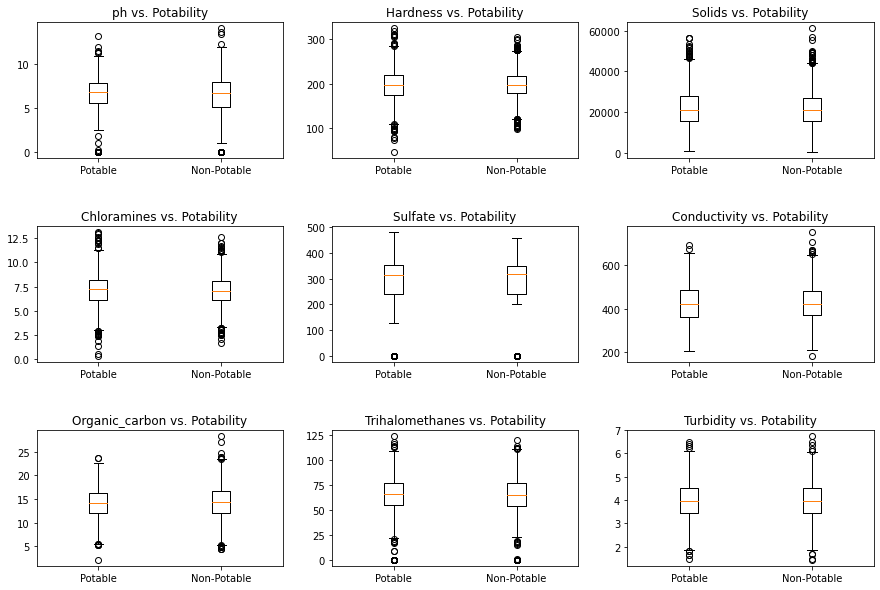

In [9]:
# Create separate DataFrames for potable and non-potable water
potable_data = data[data['Potability'] == 1]
non_potable_data = data[data['Potability'] == 0]

# Select the columns representing water quality parameters
water_quality_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for each parameter
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(water_quality_columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    # Create box plots for each parameter for potable and non-potable water
    ax.boxplot([potable_data[column], non_potable_data[column]], labels=['Potable', 'Non-Potable'])
    ax.set_title(f'{column} vs. Potability')

plt.show()


### 2) z-scores

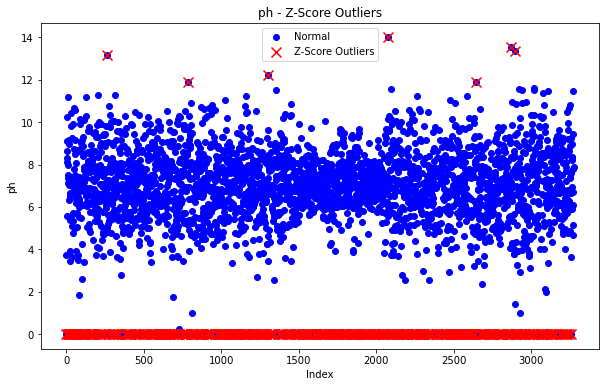

Z-score outliers:
0       0.0
8       0.0
13      0.0
20      0.0
22      0.0
       ... 
3224    0.0
3229    0.0
3231    0.0
3245    0.0
3260    0.0
Name: ph, Length: 499, dtype: float64


In [10]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Calculate the Z-scores for the selected parameter
z_scores = np.abs(stats.zscore(data[parameter]))
z_threshold = 2

# Identify Z-score outliers
z_score_outliers = data[parameter][z_scores > z_threshold]

# Plot for Z-Score Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(z_score_outliers.index, z_score_outliers, c='r', label='Z-Score Outliers', marker='x', s=100)
plt.title(f'{parameter} - Z-Score Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("Z-score outliers:")
print(z_score_outliers)

### 3) Inter Quartile Range(IQR)

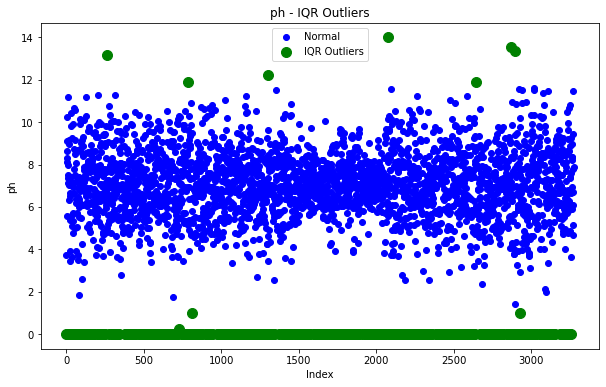

IQR outliers:
0       0.0
8       0.0
13      0.0
20      0.0
22      0.0
       ... 
3224    0.0
3229    0.0
3231    0.0
3245    0.0
3260    0.0
Name: ph, Length: 502, dtype: float64


In [11]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Calculate the IQR for the selected parameter
Q1 = data[parameter].quantile(0.25)
Q3 = data[parameter].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection using IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR

# Identify IQR outliers
iqr_outliers = data[parameter][(data[parameter] < iqr_lower_bound) | (data[parameter] > iqr_upper_bound)]

# Plot for IQR Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(iqr_outliers.index, iqr_outliers, c='g', label='IQR Outliers', marker='o', s=100)
plt.title(f'{parameter} - IQR Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("IQR outliers:")
print(iqr_outliers)

### 4) Isolation Forest

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


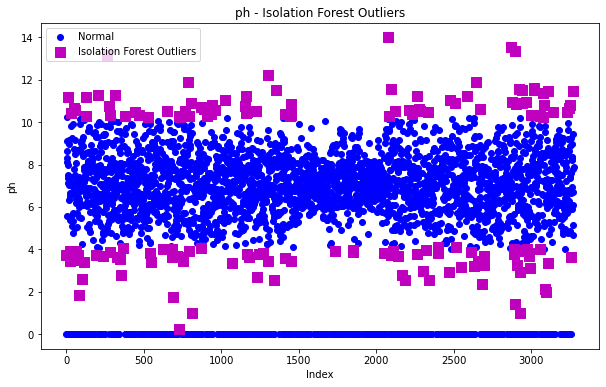

Isolation Forest outliers:
1        3.716080
9       11.180284
23       3.902476
26       3.445062
32      10.433291
          ...    
3233    10.485604
3246    10.667364
3249    10.808157
3261     3.629922
3269    11.491011
Name: ph, Length: 162, dtype: float64


In [12]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers_iforest = clf.fit_predict(data[[parameter]])

# Filter out Isolation Forest outliers
iforest_outliers = data[parameter][outliers_iforest == -1]

# Plot for Isolation Forest Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(iforest_outliers.index, iforest_outliers, c='m', label='Isolation Forest Outliers', marker='s', s=100)
plt.title(f'{parameter} - Isolation Forest Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("Isolation Forest outliers:")
print(iforest_outliers)

#### Conclusion:
Hence, Successfully explored and visualised various anolamy detection techniques considering one parameter 'ph'.

## C. Development Part 1 - Data Preprocessing and Exploratory Data Analysis

### Data Preprocessing Using IBM Cognos Analytics
#### Original dataset
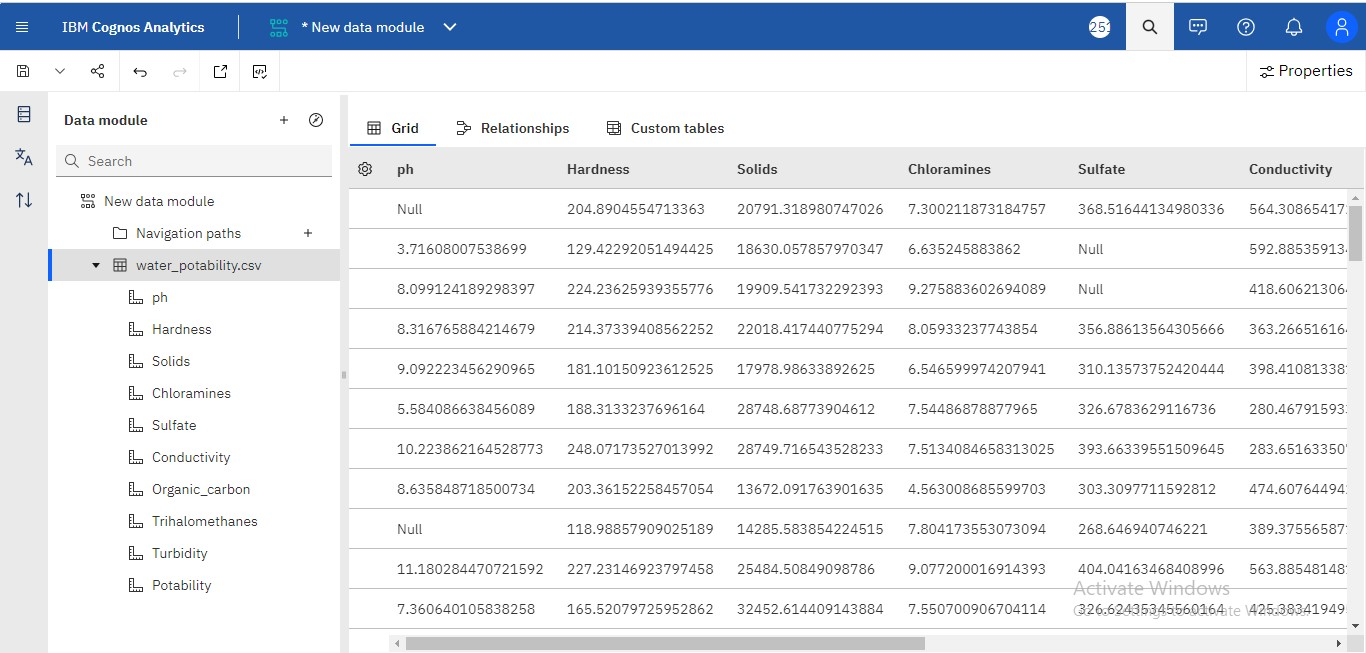

####  Replacing the Null Values with average for all the columns (eg, is shown for ph)
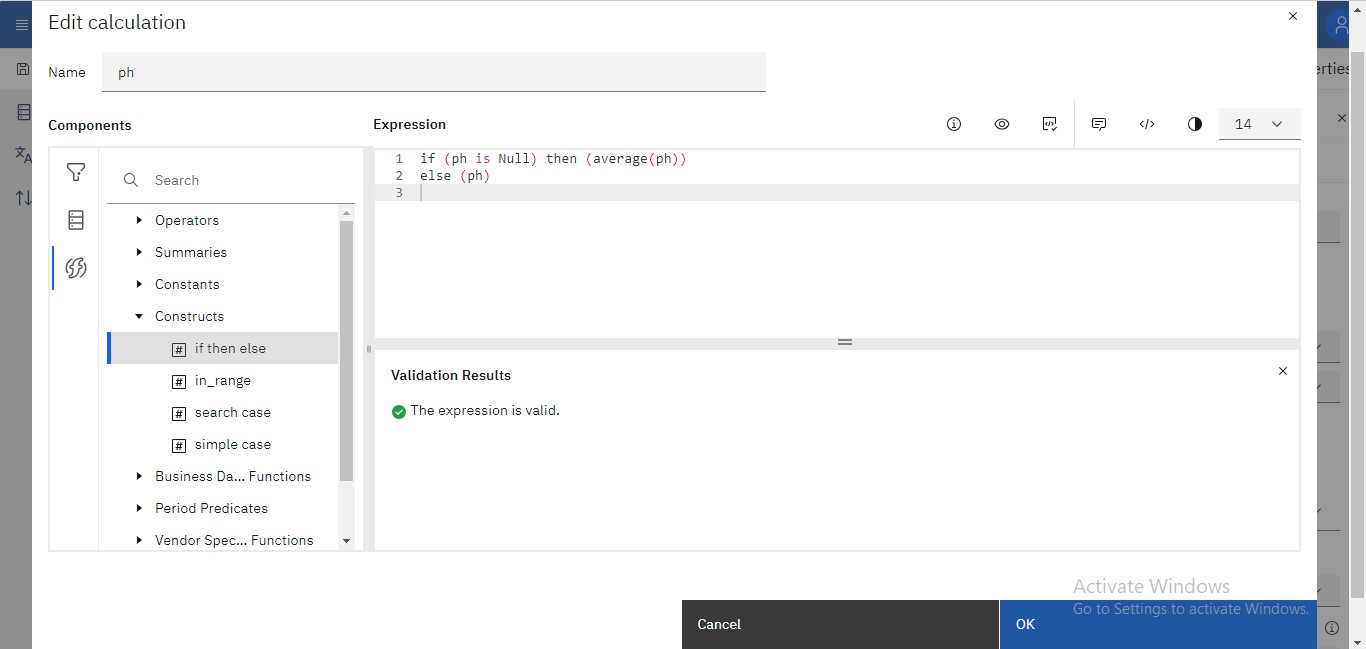

#### Dataset after replacing all columns with average 
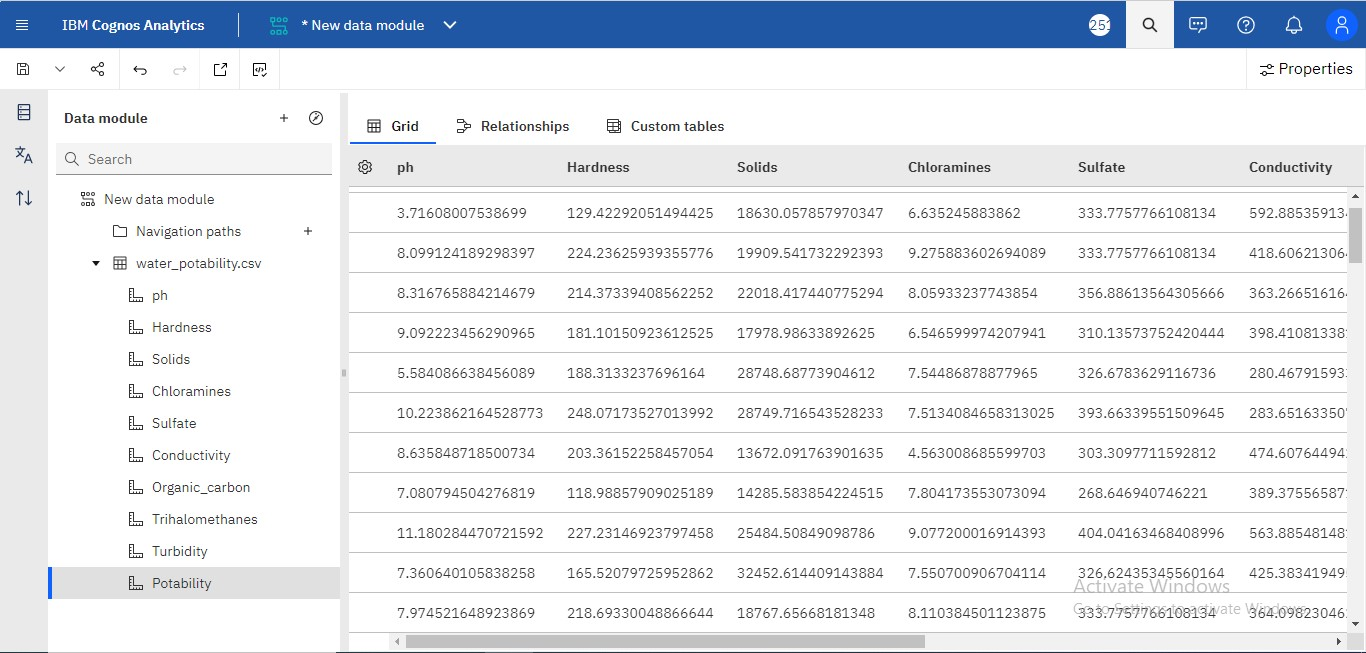

#### Formatting the type of data - eg for ph- type will be Number and decimal places is 3
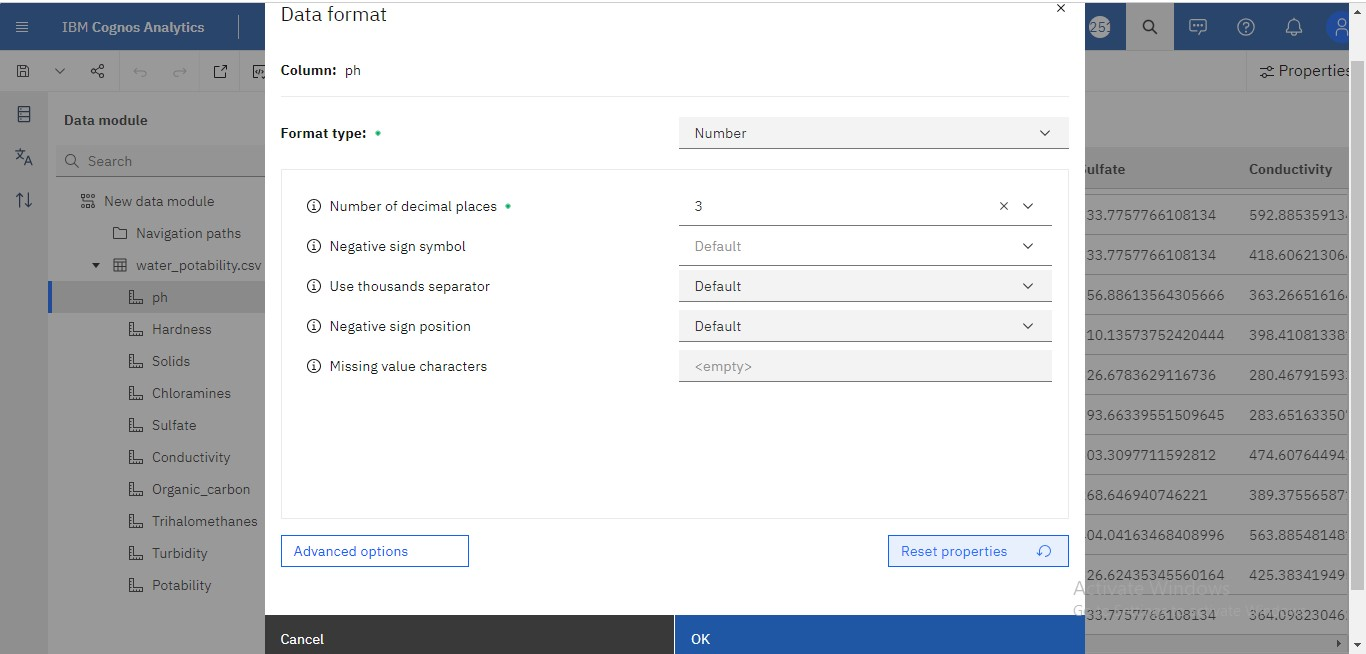

#### The dataset after all preprocessing steps
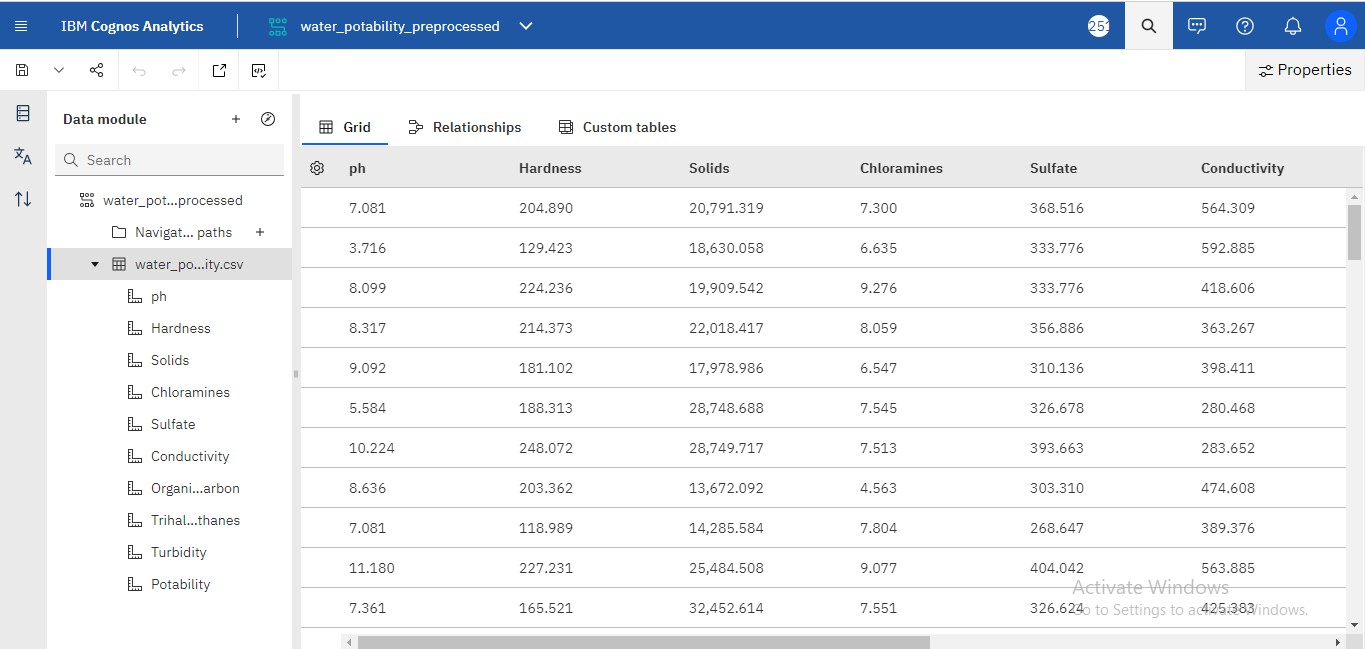

### Data Preprocessing using Python

### Data Cleaning - Handling Missing Values in Python using Pandas

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [8]:
# Replacing rows with missing values as mean
data_cleaned = data.fillna(data.mean(),inplace=True)

In [9]:
#checking for null values again
missing_values = data.isnull().sum()
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


#### Drop duplicates

In [10]:
#Drop duplicates
# Count the number of rows before removing duplicates
before_duplicates = data.shape[0]

# Remove duplicates
data.drop_duplicates(inplace=True)

# Count the number of rows after removing duplicates
after_duplicates = data.shape[0]

# Check if duplicates were removed
if before_duplicates > after_duplicates:
    print(f"Duplicates have been removed. Rows before: {before_duplicates}, Rows after: {after_duplicates}")
else:
    print("No duplicates were found in the dataset.")



No duplicates were found in the dataset.


#### Handling Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


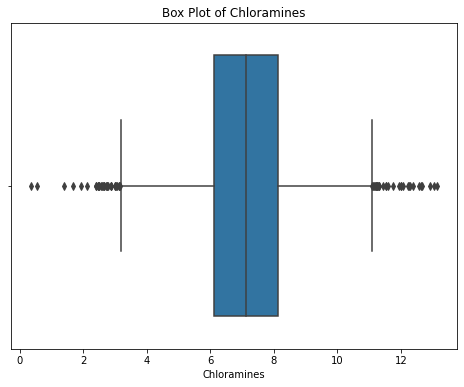

In [11]:
# Create a box plot for a specific feature (e.g., 'Chloramines')
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Chloramines'], orient="v")
plt.title('Box Plot of Chloramines')
plt.show()


In [20]:
## removing outliers
# Calculate Z-scores for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for Z-scores (e.g., 3) to identify outliers
threshold = 3

# Create a new DataFrame without outliers
df = data[(z_scores <= threshold).all(axis=1)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


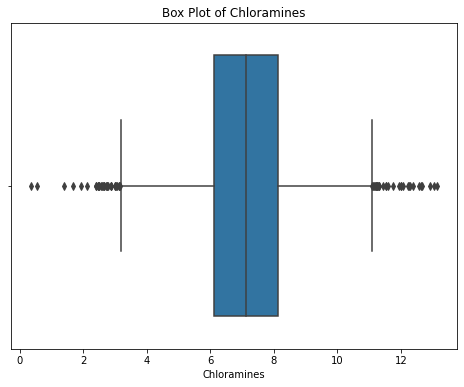

In [21]:
# Create a box plot for a specific feature (e.g., 'Chloramines')
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Chloramines'], orient="v")
plt.title('Box Plot of Chloramines')
plt.show()


In [22]:
# Check the shape (number of rows and columns) of the original and modified data
original_shape = data.shape
new_shape = df.shape

print("Original Data Shape:", original_shape)
print("Data without Outliers Shape:", new_shape)

# Print some summary statistics to see the effect of removing outliers
original_stats = data.describe()
new_stats = df.describe()

print("\nSummary Statistics of Original Data:")
print(original_stats)

print("\nSummary Statistics of Data without Outliers:")
print(new_stats)


Original Data Shape: (3276, 10)
Data without Outliers Shape: (3128, 10)

Summary Statistics of Original Data:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293

### Exploratory Data Analysis with IBM Cognos Analytics

##### Different visualizations along with the Analytics details using IBM Cognos

#### Box Plot to visualize outliers- for ph
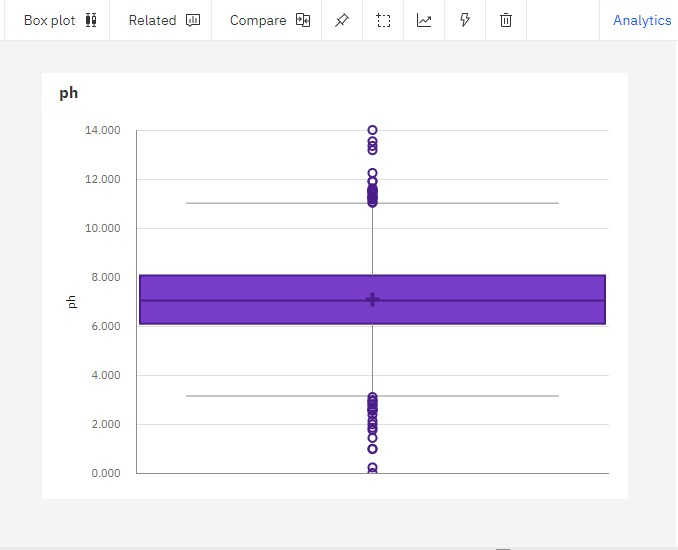

#### Line-Column graph visualisation for Solids and Sulfates by Hardness
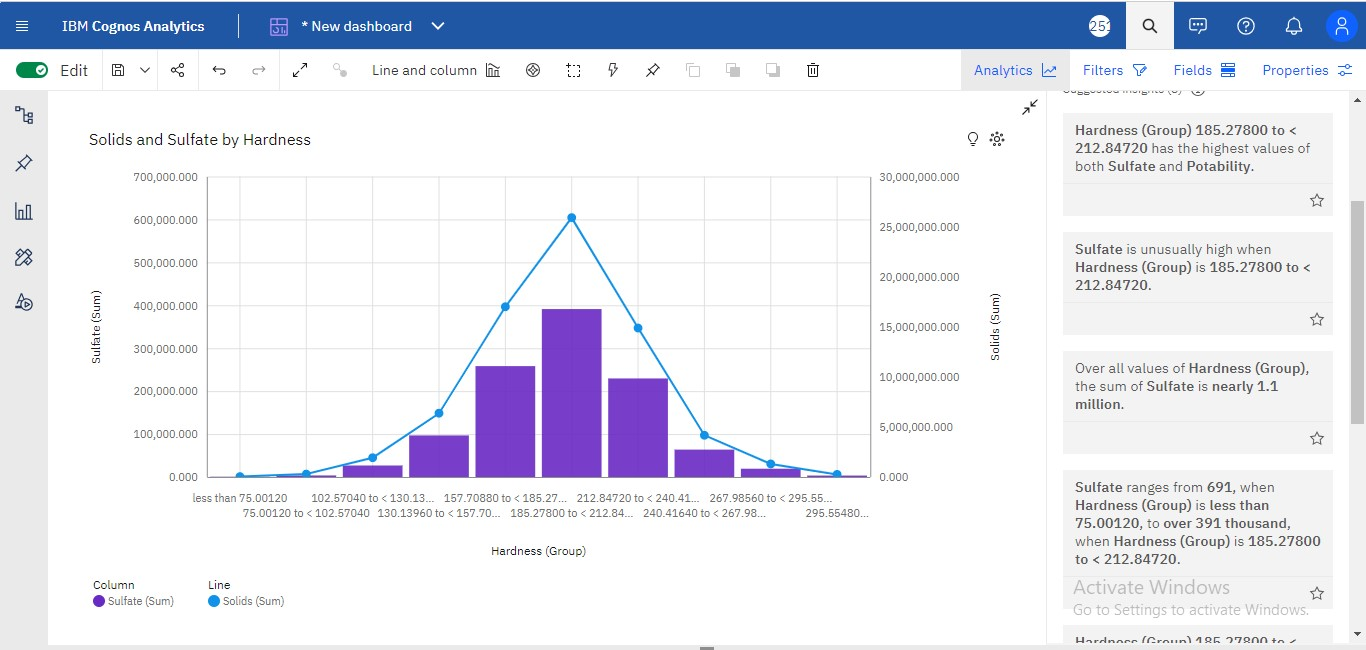

#### Narrative Insights from above visualization
Hardness (Group) 185.27800 to < 212.84720 has the highest values of both Sulfate and Potability.

Sulfate is unusually high when Hardness (Group) is 185.27800 to < 212.84720.

Over all values of Hardness (Group), the sum of Sulfate is nearly 1.1 million.

Sulfate ranges from 691, when Hardness (Group) is less than 75.00120, to over 391 thousand, when Hardness (Group) is 185.27800 to < 212.84720.

Hardness (Group) 185.27800 to < 212.84720 has the highest values of both Solids and Potability.

Solids is unusually high when Hardness (Group) is 185.27800 to < 212.84720.

Across all values of Hardness (Group), the sum of Solids is over 72 million.

Solids ranges from nearly 40 thousand, when Hardness (Group) is less than 75.00120, to nearly 26 million, when Hardness (Group) is 185.27800 to < 212.84720.

#### Packed Bubble Graph Visualization for Chloramines colored by Sulfate sized by Hardness
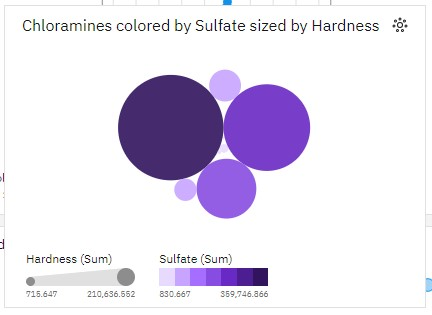

#### Narrative Insights
Chloramines (Group) (2) 6.7395000000000010 to < 8.0170000000000010 has the highest values of both Hardness and Sulfate.

6.7395000000000010 to < 8.0170000000000010 Sulfate at nearly 360 thousand is 41% higher than the Hardness of almost 211 thousand.

Across all values of Chloramines (Group) (2), the sum of Hardness is over 643 thousand.

Hardness ranges from 715.6, when Chloramines (Group) (2) is less than 1.6295000000000006, to almost 211 thousand, when Chloramines (Group) (2) is 6.7395000000000010 to < 8.0170000000000010.

For Hardness, the most significant values of Chloramines (Group) (2) are 6.7395000000000010 to < 8.0170000000000010, 5.4620000000000015 to < 6.7395000000000010, and 8.0170000000000010 to < 9.2945000000000010, whose respective Hardness values add up to over 503 thousand, or 78.2 % of the total.


#### Bar Graph for ph by potability
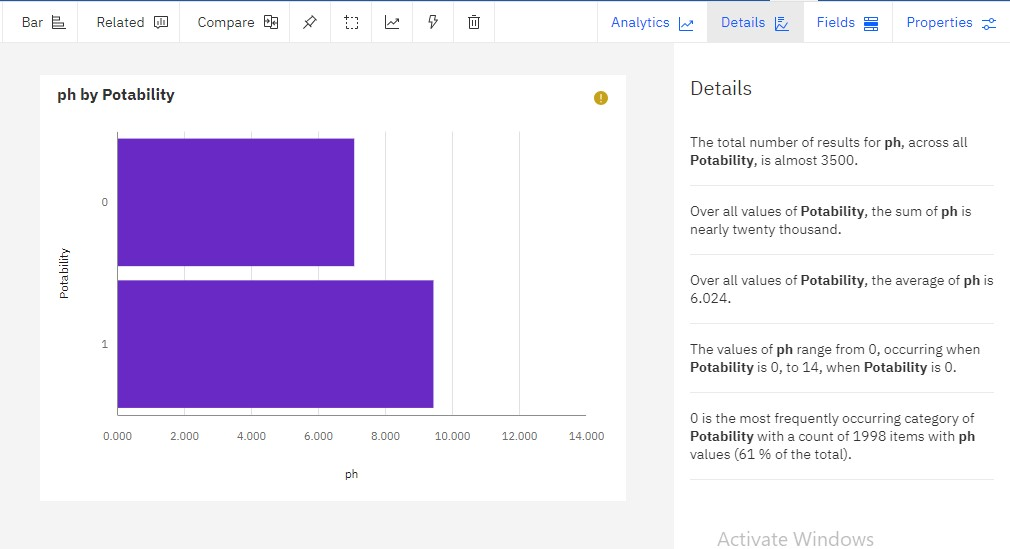
#### Details about the above bar graph 
The total number of results for ph, across all Potability, is almost 3500.

Over all values of Potability, the sum of ph is nearly twenty thousand.

Over all values of Potability, the average of ph is 6.024.

The values of ph range from 0, occurring when Potability is 0, to 14, when Potability is 0.

0 is the most frequently occurring category of Potability with a count of 1998 items with ph values (61 % of the total).

#### Column graph - for turbidity by potability
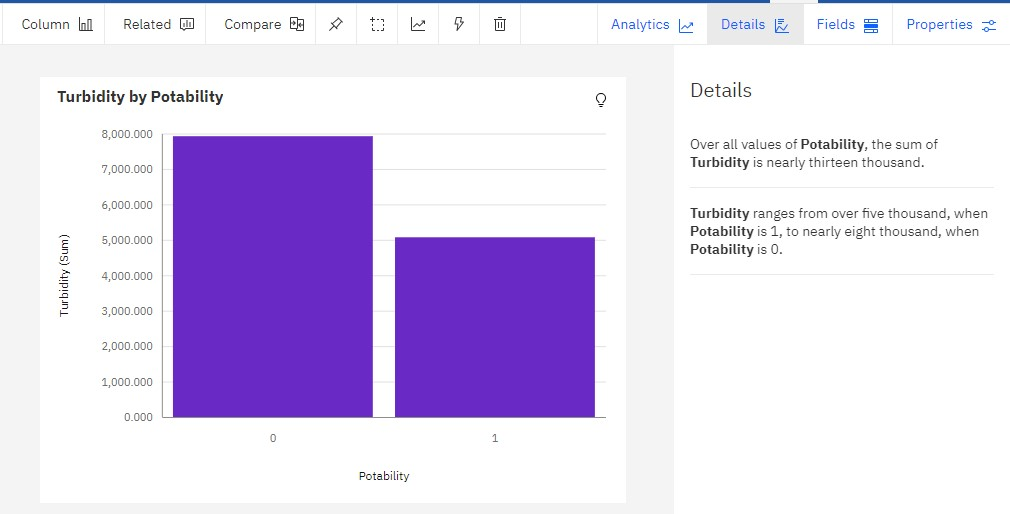

#### Radial Plot
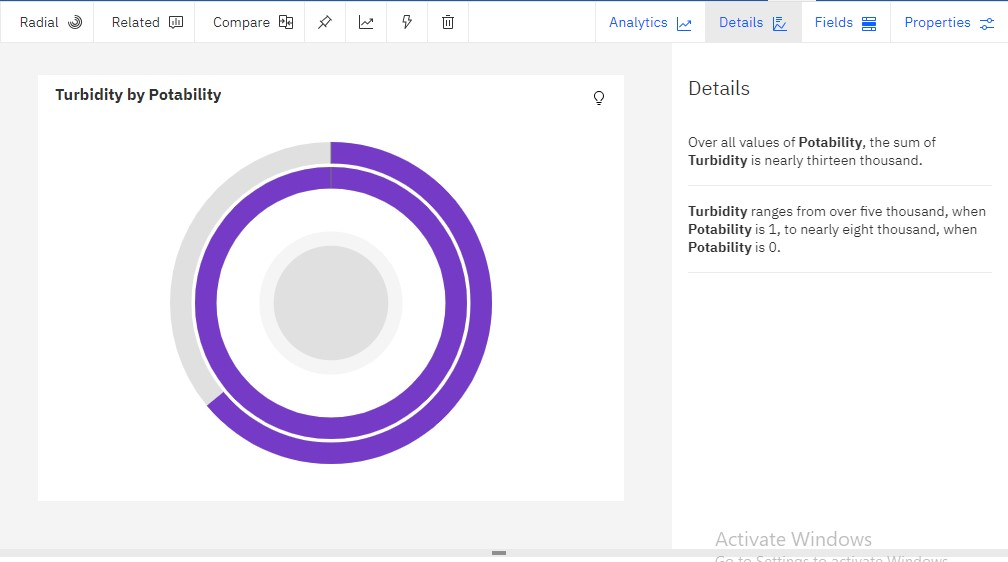

#### Pie Chart for Turbidity w.r.t Potability
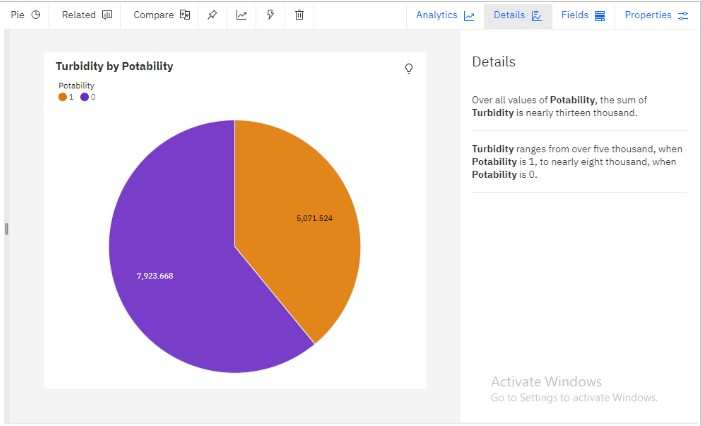

#### Pie Chart for Sulphate w.r.t Potability
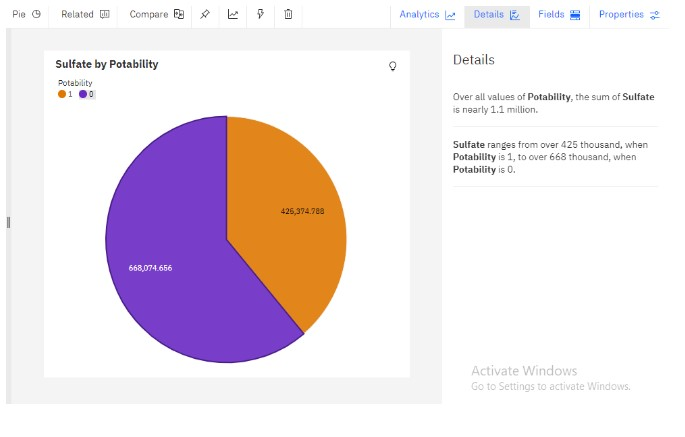

### Exploratory Data Analysis using Python

#### Indexing

In [24]:
data.iloc[0]

ph                     7.080795
Hardness             204.890455
Solids             20791.318981
Chloramines            7.300212
Sulfate              368.516441
Conductivity         564.308654
Organic_carbon        10.379783
Trihalomethanes       86.990970
Turbidity              2.963135
Potability             0.000000
Name: 0, dtype: float64

In [25]:
data.isnull()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     False     False   False        False    False         False   
1     False     False   False        False    False         False   
2     False     False   False        False    False         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3271  False     False   False        False    False         False   
3272  False     False   False        False    False         False   
3273  False     False   False        False    False         False   
3274  False     False   False        False    False         False   
3275  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0              False            False      False       False  
1              False            False      False       False  
2              False            False      False       False  
3              False            False      False       False  
4              False            False      False       False  
...              ...              ...        ...         ...  
3271           False            False      False       False  
3272           False            False      False       False  
3273           False            False      False       False  
3274           False            False      False       False  
3275           False            False      False       False  

[3276 rows x 10 columns]

#### Frequency Distribution

In [26]:
data['Hardness'].value_counts()

204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64

In [27]:
data['ph'].value_counts()

7.080795    491
8.554097      1
6.538084      1
5.915807      1
8.136498      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: ph, Length: 2786, dtype: int64

In [28]:
data['Sulfate'].value_counts()

333.775777    781
280.745623      1
332.744519      1
391.918229      1
330.905370      1
             ... 
343.620823      1
359.710517      1
389.219586      1
337.231469      1
359.948574      1
Name: Sulfate, Length: 2496, dtype: int64

In [29]:
data['Solids'].value_counts()

20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: Solids, Length: 3276, dtype: int64

In [30]:
data['Chloramines'].value_counts()

7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64

In [31]:
data['Organic_carbon'].value_counts()

10.379783    1
12.897635    1
15.871770    1
11.545477    1
12.284334    1
            ..
15.310631    1
11.235144    1
20.605552    1
12.092499    1
16.140368    1
Name: Organic_carbon, Length: 3276, dtype: int64

#### Slicing

In [32]:
data[10:15]

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
10  7.360640  165.520797  32452.614409     7.550701  326.624353    425.383419   
11  7.974522  218.693300  18767.656682     8.110385  333.775777    364.098230   
12  7.119824  156.704993  18730.813653     3.606036  282.344050    347.715027   
13  7.080795  150.174923  27331.361962     6.838223  299.415781    379.761835   
14  7.496232  205.344982  28388.004887     5.072558  333.775777    444.645352   

    Organic_carbon  Trihalomethanes  Turbidity  Potability  
10       15.586810        78.740016   3.662292           0  
11       14.525746        76.485911   4.011718           0  
12       15.929536        79.500778   3.445756           0  
13       19.370807        76.509996   4.413974           0  
14       13.228311        70.300213   4.777382           0

In [33]:
data.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [34]:
data_types = data.dtypes
print(data_types)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [35]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

### Visualization

### Correlation matrix

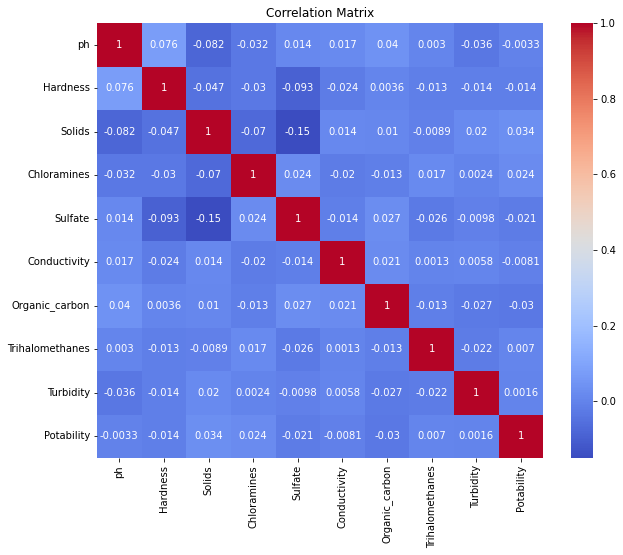

In [36]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Count Plot

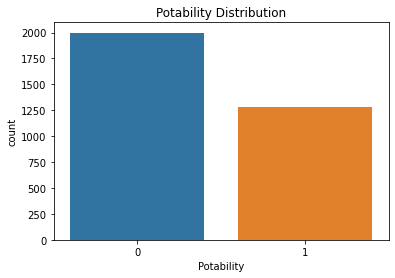

In [37]:
# Distribution of the 'Potability' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=data)
plt.title('Potability Distribution')
plt.show()

### Pair Plot

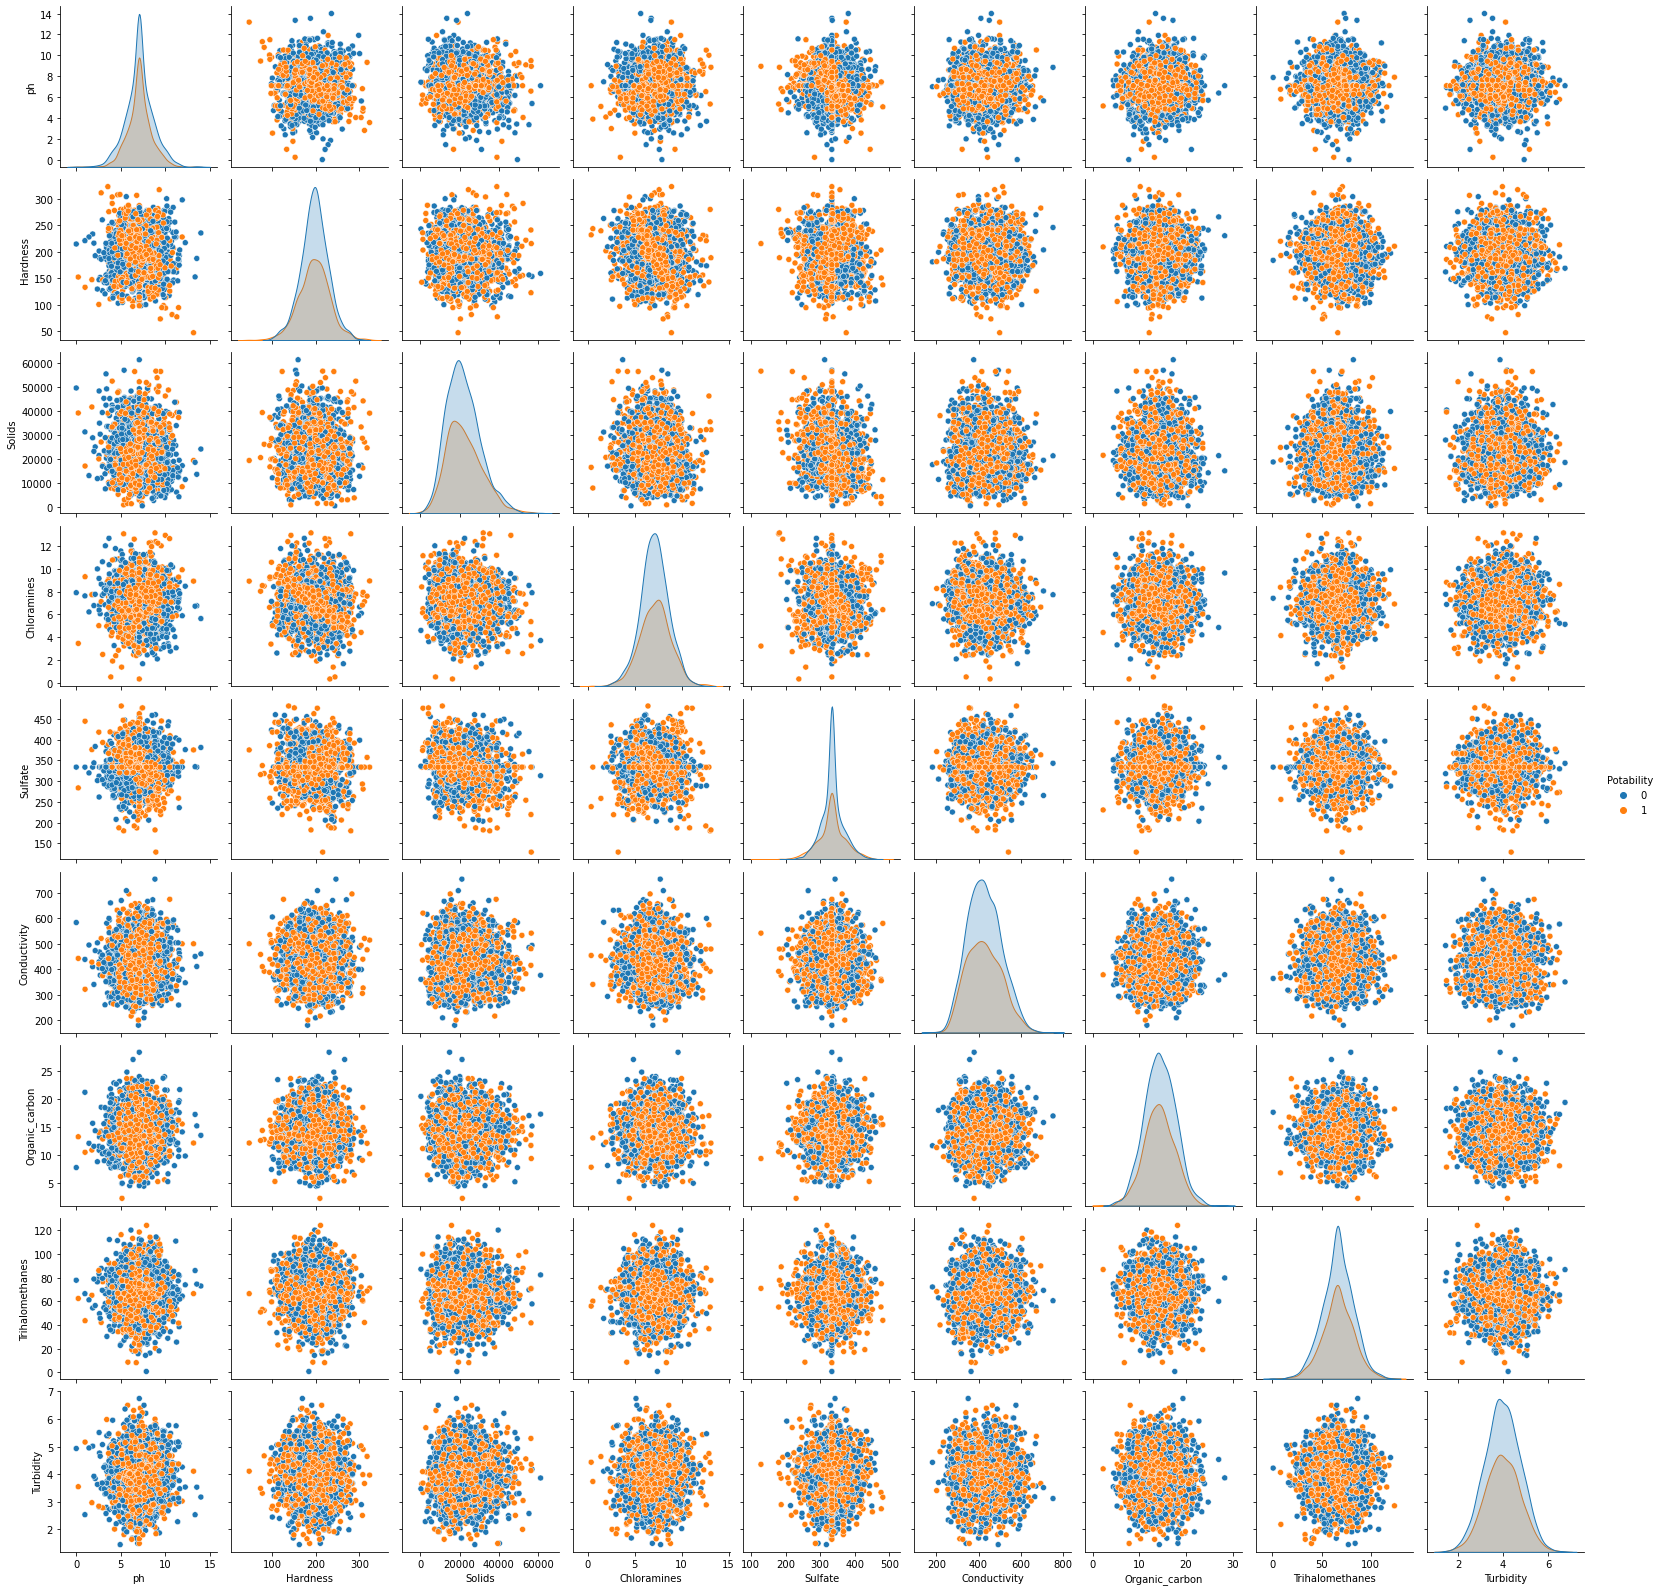

In [38]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Potability', diag_kind='kde')
plt.show()

### Box Plot

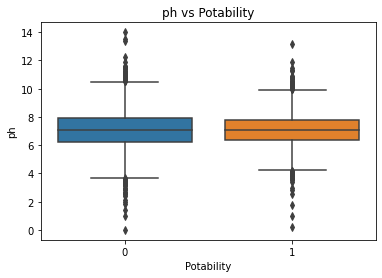

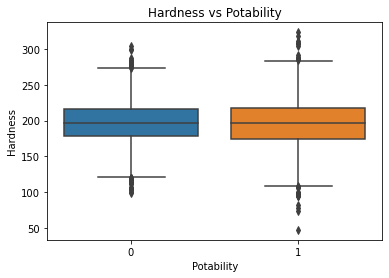

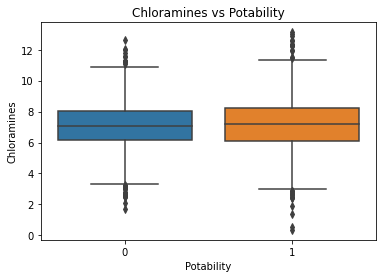

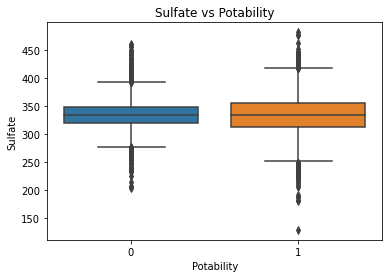

In [39]:
# Box plots for selected features
selected_features = ['ph', 'Hardness', 'Chloramines', 'Sulfate']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Potability', y=feature, data=data)
    plt.title(f'{feature} vs Potability')
    plt.show()

### Histogram

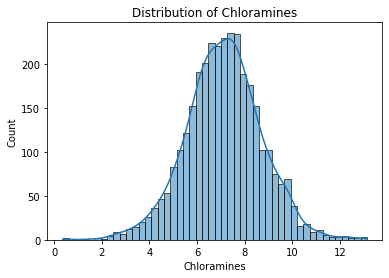

In [40]:
# Distribution of a specific parameter, e.g., 'Chloramines'
plt.figure(figsize=(6, 4))
sns.histplot(data['Chloramines'], kde=True)
plt.title('Distribution of Chloramines')
plt.show()


#### Conclusion:
Hence, the water quality analysis has been preprocessed, exploratory data analysis has been performed successfully. The missing values are handled and outliers are visualized.

## D. Development Part 2 - Visualizations and Predictive Modelling

### Visualization using IBM Cognos Analytics
#### Count Plot
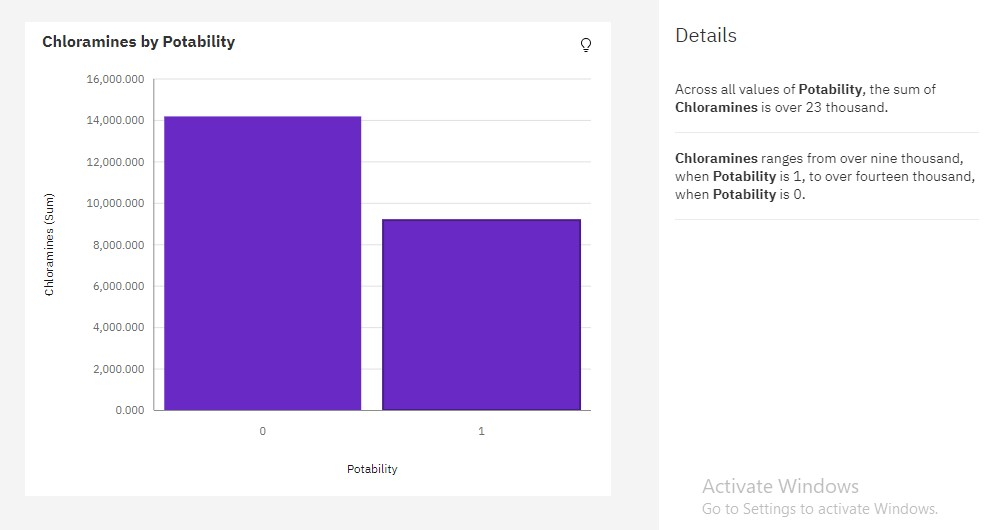

#### Line - Column plot
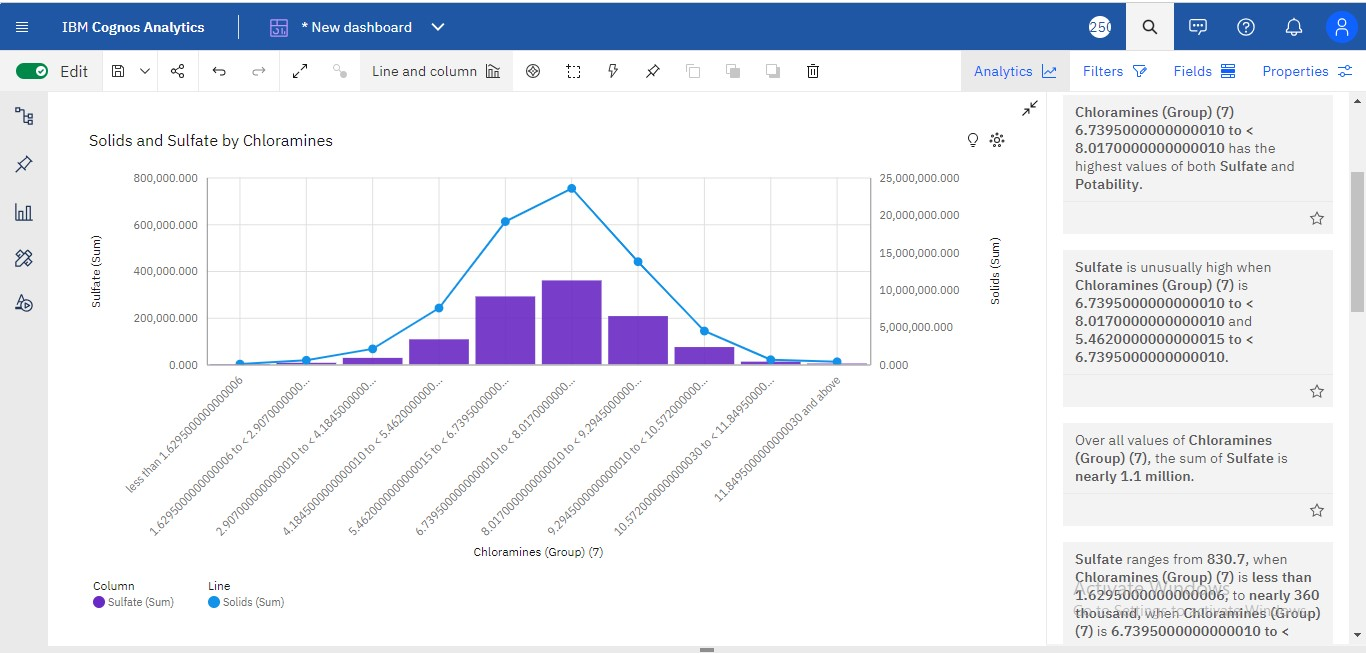

Chloramines (Group) (7) 6.7395000000000010 to < 8.0170000000000010 has the highest values of both Sulfate and Potability.

Sulfate is unusually high when Chloramines (Group) (7) is 6.7395000000000010 to < 8.0170000000000010 and 5.4620000000000015 to < 6.7395000000000010.

Over all values of Chloramines (Group) (7), the sum of Sulfate is nearly 1.1 million.

Sulfate ranges from 830.7, when Chloramines (Group) (7) is less than 1.6295000000000006, to nearly 360 thousand, when Chloramines (Group) (7) is 6.7395000000000010 to < 8.0170000000000010.

For Sulfate, the most significant values of Chloramines (Group) (7) are 6.7395000000000010 to < 8.0170000000000010, 5.4620000000000015 to < 6.7395000000000010, and 8.0170000000000010 to < 9.2945000000000010, whose respective Sulfate values add up to over 858 thousand, or 78.5 % of the total.

Chloramines (Group) (7) 6.7395000000000010 to < 8.0170000000000010 has the highest values of both Solids and Potability.

Solids is unusually high when Chloramines (Group) (7) is 6.7395000000000010 to < 8.0170000000000010 and 5.4620000000000015 to < 6.7395000000000010.

Across all values of Chloramines (Group) (7), the sum of Solids is over 72 million.

Solids ranges from nearly 53 thousand, when Chloramines (Group) (7) is less than 1.6295000000000006, to almost 24 million, when Chloramines (Group) (7) is 6.7395000000000010 to < 8.0170000000000010.

For Solids, the most significant values of Chloramines (Group) (7) are 6.7395000000000010 to < 8.0170000000000010, 5.4620000000000015 to < 6.7395000000000010, and 8.0170000000000010 to < 9.2945000000000010, whose respective Solids values add up to over 56 million, or 78.2 % of the total.


#### Scatter Plot
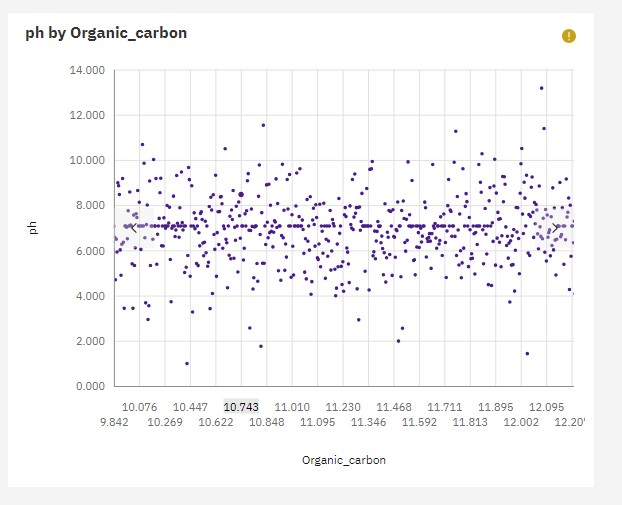

### Visualization using Python
#### Histogram

<Figure size 864x720 with 0 Axes>

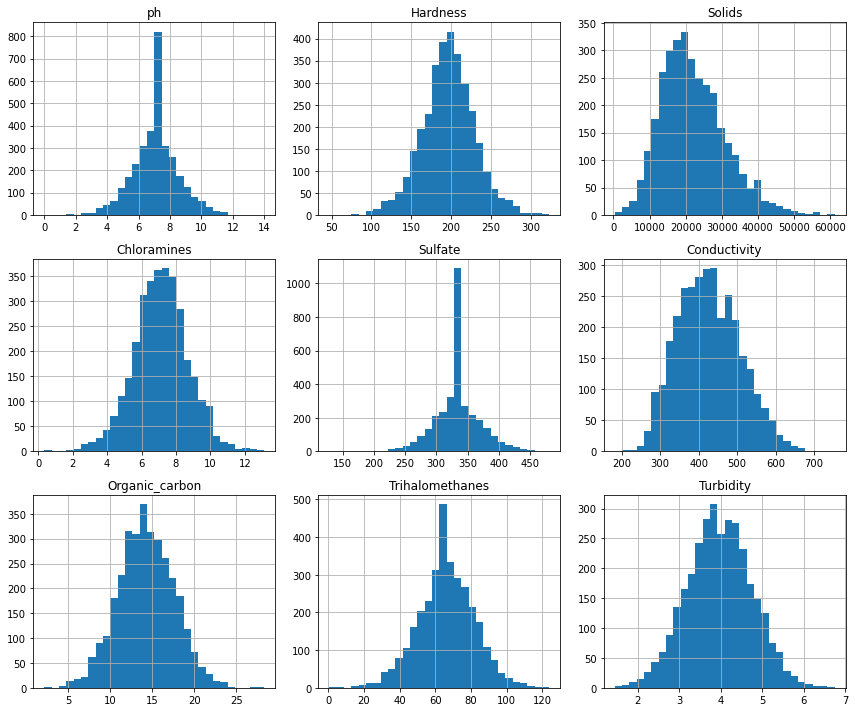

In [43]:
# Plot histograms for numerical features
plt.figure(figsize=(12, 10))
data.drop('Potability', axis=1).hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

#### Box Plot

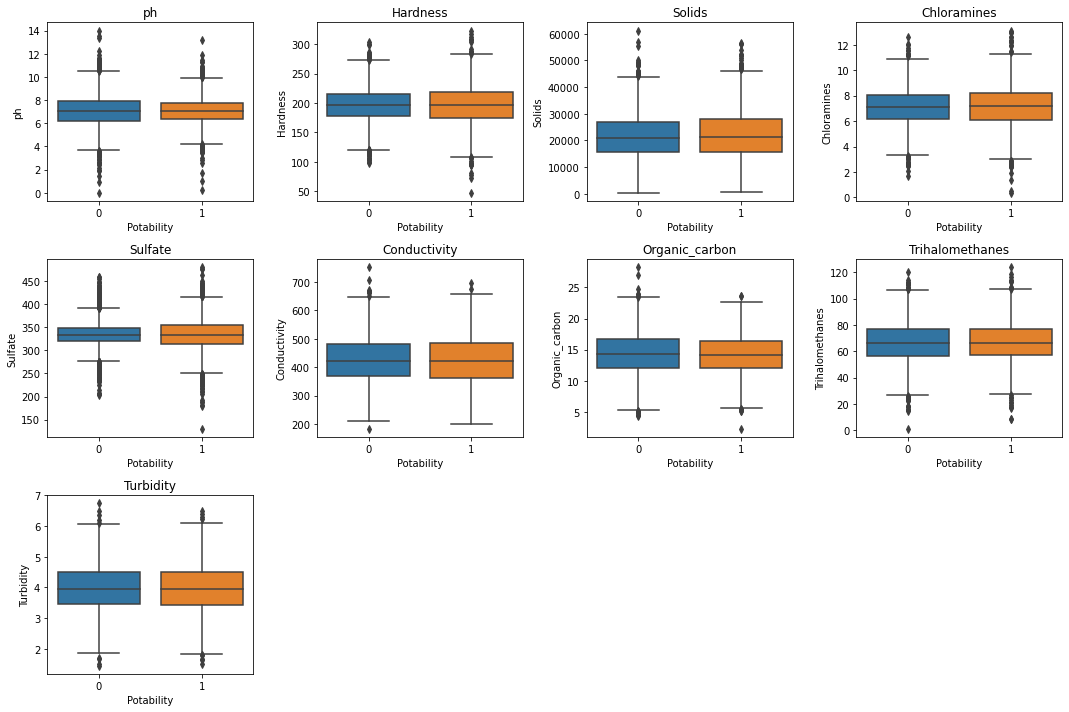

In [44]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=data, x='Potability', y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

#### Correlation Matrix

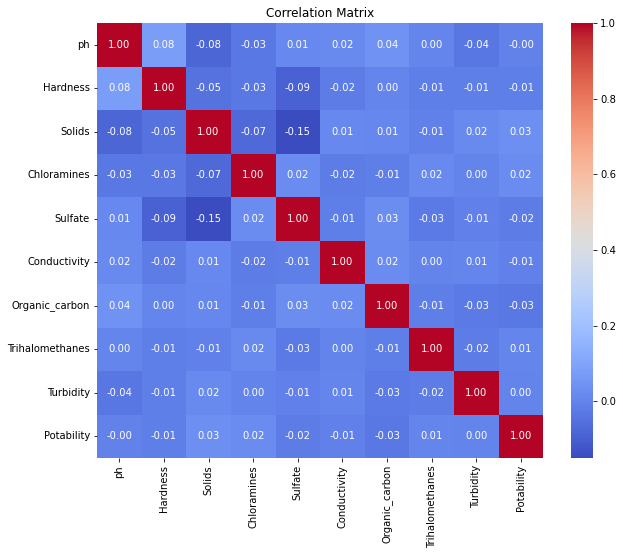

In [46]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Scatter Plots

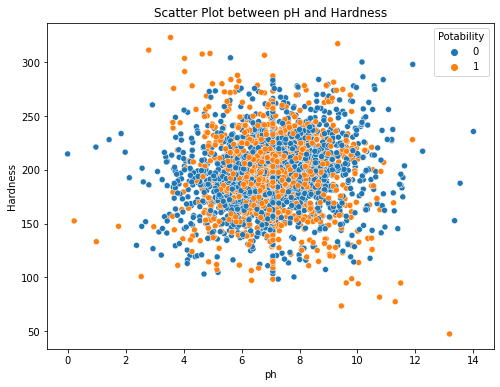

In [47]:
# Scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ph', y='Hardness', hue='Potability', data=data)
plt.title('Scatter Plot between pH and Hardness')
plt.show()

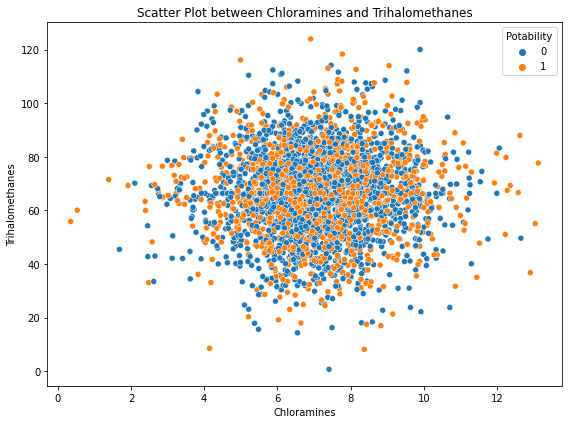

In [49]:
# Scatter plot 2: 'Chloramines' vs 'Trihalomethanes'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chloramines', y='Trihalomethanes', hue='Potability', data=data)
plt.title('Scatter Plot between Chloramines and Trihalomethanes')

plt.tight_layout()
plt.show()

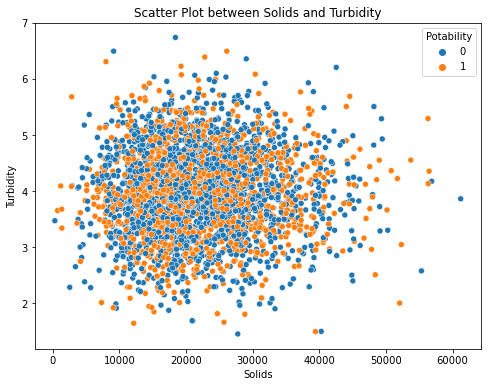

In [50]:
# Scatter plot for 'Solids' vs 'Turbidity' colored by 'Potability'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solids', y='Turbidity', hue='Potability', data=data)
plt.title('Scatter Plot between Solids and Turbidity')
plt.show()

### Predictive Modelling

### 1) Linear Regression

In [52]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [62]:
#Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.Organic_carbon, data.Potability)

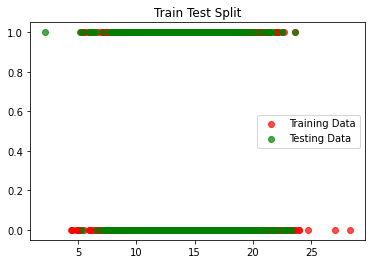

In [63]:
#Visualizing the training and testing datasets
plt.scatter(x_train,y_train,label = 'Training Data',color ='r',alpha=.7)
plt.scatter(x_test,y_test,label='Testing Data',color='g',alpha=.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

In [64]:
# Create linear model and train it
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [65]:
#Use model to predict on test data
predict = lr.predict(x_test.values.reshape(-1,1))

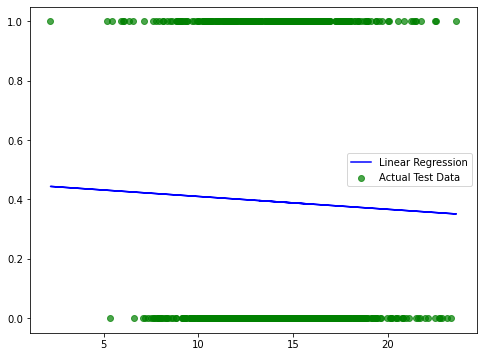

In [66]:
#Plot predict line against actual test data
plt.figure(figsize=(8, 6))
plt.plot(x_test,predict,label='Linear Regression',color='b')
plt.scatter(x_test,y_test,label='Actual Test Data',color = 'g',alpha=0.7)
plt.legend()
plt.show()

In [67]:
#Score this model
lr.score(x_test.values.reshape(-1,1),y_test.values)

0.0009275817262517361

### 2) Random Forest

In [68]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((2194, 9), (1082, 9))

In [70]:
X_train.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

In [72]:
encoder = ce.OrdinalEncoder(cols=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [73]:
X_train.head()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
1556   1         1       1            1        1             1   
1362   2         2       2            2        2             2   
2787   3         3       3            3        3             3   
1134   4         4       4            4        4             4   
1509   5         5       5            5        2             5   

      Organic_carbon  Trihalomethanes  Turbidity  
1556               1                1          1  
1362               2                2          2  
2787               3                3          3  
1134               4                4          4  
1509               5                5          5

In [74]:
X_test.head()

ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
2947  1.0      -1.0    -1.0         -1.0     -1.0          -1.0   
2782 -1.0      -1.0    -1.0         -1.0     -1.0          -1.0   
1644 -1.0      -1.0    -1.0         -1.0     -1.0          -1.0   
70   -1.0      -1.0    -1.0         -1.0     -1.0          -1.0   
2045 -1.0      -1.0    -1.0         -1.0      2.0          -1.0   

      Organic_carbon  Trihalomethanes  Turbidity  
2947            -1.0             -1.0       -1.0  
2782            -1.0             -1.0       -1.0  
1644            -1.0             -1.0       -1.0  
70              -1.0             -1.0       -1.0  
2045            -1.0             -1.0       -1.0

In [75]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [76]:
# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.3715


In [77]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
print(y_pred_100)

[1 1 1 ... 1 1 1]


In [78]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.3715


In [79]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Trihalomethanes    0.120030
ph                 0.119992
Sulfate            0.111376
Solids             0.110855
Organic_carbon     0.109489
Conductivity       0.108759
Chloramines        0.108340
Turbidity          0.108213
Hardness           0.102946
dtype: float64

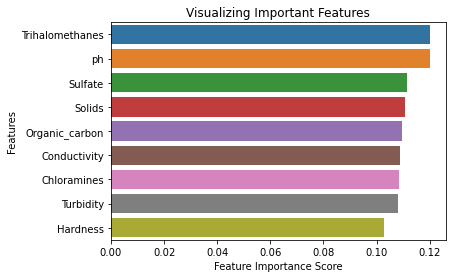

In [80]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [81]:
X = data.drop(['Potability', 'ph'], axis=1)
y = data['Potability']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [83]:
encoder = ce.OrdinalEncoder(cols=['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [84]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [85]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.3715


In [88]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0 680]
 [  0 402]]


#### Conclusion:
This model of random forest is less accurate with accuracy nearly equal to 37%

### 3) Logistic Regression

In [110]:
features =['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']
x = data[features]
y = data.Potability

In [142]:
#Spliting the dataset into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = 0)

In [143]:
#Training the dataset (x_train,y_train) 
reg = LogisticRegression(max_iter = 1000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [144]:
#Predicting values of y_test using x_test
y_predict = reg.predict(x_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [145]:
# Forming confusion matrix for actual and predicted y(Outcome) values
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[501,   1],
       [317,   0]], dtype=int64)

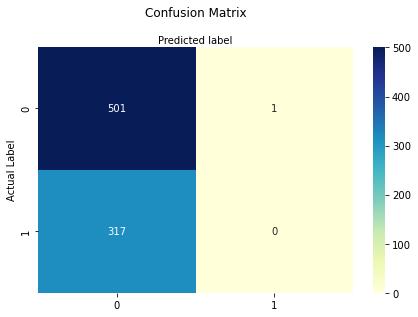

In [146]:
# Plotting confusion matrix using heatmaps
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap ="YlGnBu",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label');

In [148]:
#Performance metrics: 4 metrics are used to analyse the performance of dataset.These are accuracy,precision,recall and f1 score
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.6117216117216118


##### The model accuracy is 61%

### Using Logistic Regression the Potability of the water is accessed. Let us test the model with sample data

### The model will give 0 if not potable and 1 if potable. If the prediction is 0 it will print "not potable" else "potable"

In [149]:
sample_data = np.array([[12.5, 180.0, 250.0, 7.0, 300.0, 500.0, 2.2, 28.0, 4.0],
                        [6.5, 190.0, 350.0, 8.0, 270.0, 450.0, 2.5, 25.0, 4.5]])
sample_pred = reg.predict(sample_data)
for i in sample_pred:
    if i==0:
        print("Not Portable")
    else:
        print("Portable")

Not Portable
Not Portable


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Conclusion: 
The accuracy of this Logistic Regression Model is 0.6117 which is 61%. Hence we can say with 61% probability the given water sample is not portable in both the cases.


## IV. The insights from the analysis can help assess water quality and determine portability

Insights obtained from the analysis, especially when examining relationships between various water quality parameters and potability, can be instrumental in assessing water quality and determining its portability. Here's how the insights from the analysis can aid in this process:

### Relationship Understanding
Understanding the relationship between different parameters (e.g., pH, hardness, solids, chloramines) and water potability is crucial.

##### pH Level:
Identifying the correlation between pH levels and potability can indicate whether variations in pH impact water safety. For instance, a certain pH range might consistently align with potable water, indicating its significance in assessing quality.
##### Other Parameters: 
Similar analyses for other parameters like hardness, solids, or chlorine levels can unveil how changes in these metrics affect potability. This knowledge helps in setting thresholds and guidelines for safe water standards.

### Deviation Identification
Detecting deviations from regulatory standards or typical ranges can highlight potential issues that affect potability.

##### Anomaly Detection:
 Unusual patterns or outliers in parameters can signal potential problems. Anomalous readings in certain parameters might signify contamination or unsuitability for consumption, prompting further investigation or corrective measures.
 
##### Regulatory Comparison: 
Comparing the dataset against established regulatory standards can identify areas where water quality falls below acceptable levels. It can be an essential guide to ensuring water safety for consumption.

### Intervention and Improvement
Using the insights obtained, improvements can be made to enhance water quality and safety.

##### Treatment Recommendations: 
Understanding which parameters significantly influence potability can guide targeted water treatment processes. For instance, if a specific parameter consistently indicates non-potability, specialized treatment can be applied to address it.
##### Preventive Measures: 
Early identification of trends or correlations that lead to non-potability can prompt preventive measures. It could involve regular monitoring, infrastructure updates, or targeted interventions to maintain or improve water quality.

### Predictive Model Application
Applying predictive models developed from the analysis facilitates real-time assessment and future predictions.

###### Continuous Monitoring: 
The model can be employed for ongoing monitoring, predicting potability based on real-time or newly collected data. It enables swift action upon detecting potential risks to water quality.
###### Forecasting and Planning: 
Future predictions based on historical data trends and patterns can aid in planning long-term strategies for maintaining and ensuring safe water quality standards.

### INFERENCE:
Hence successfully completed the project for "Water Quality Analysis" which includes defining analysis objectives, collecting water quality data, designing relevant visualizations, and building a predictive model.
Finally concluded with testing the model using regression with a sample data